In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data cleaning

In [6]:
aquastat = pd.read_csv('new_data.csv')
aquastat.columns

Index(['VariableGroup', 'Subgroup', 'Variable', 'Area', 'Year', 'Value',
       'Unit', 'Symbol', 'IsAggregate'],
      dtype='object')

In [7]:
aquastat.drop(columns=['VariableGroup', 'Subgroup', 'Symbol', 'IsAggregate'], axis=1, inplace=True)

In [8]:
aquastat.columns

Index(['Variable', 'Area', 'Year', 'Value', 'Unit'], dtype='object')

In [13]:
# Pivot pour les valeurs
df_values = aquastat.pivot(index=['Area', 'Year'], columns='Variable', values='Value')

# Pivot pour les unités
df_units = aquastat.pivot(index=['Area', 'Year'], columns='Variable', values='Unit')

# Ajout des suffixes pour différencier les colonnes
df_values.columns = [f"Value - {col}" for col in df_values.columns]
df_units.columns = [f"Unit - {col}" for col in df_units.columns]

# Fusion des deux DataFrames
df_combined = pd.concat([df_values, df_units], axis=1).reset_index()

cols_ordered = [col for pair in zip(df_values.columns, df_units.columns) for col in pair]
df_combined = df_combined[['Area', 'Year'] + cols_ordered]

# Affichage du résultat
df_combined.head()

,Area,Year,Value - GDP per capita,Unit - GDP per capita,Value - Human Development Index (HDI) [highest = 1],Unit - Human Development Index (HDI) [highest = 1],Value - SDG 6.4.1. Water Use Efficiency,Unit - SDG 6.4.1. Water Use Efficiency,Value - SDG 6.4.2. Water Stress,Unit - SDG 6.4.2. Water Stress,Value - Total population with access to safe drinking-water (JMP),Unit - Total population with access to safe drinking-water (JMP),Value - Total renewable water resources per capita,Unit - Total renewable water resources per capita
0,Afghanistan,2005,254.824689,current US$/inhab,0.410,NaN,0.349961,US$/m3,54.757019,%,39.1,%,2676.231569,m3/inhab/year
1,Afghanistan,2006,279.240934,current US$/inhab,0.419,NaN,0.380399,US$/m3,54.757019,%,40.8,%,2567.706001,m3/inhab/year
2,Afghanistan,2007,363.357619,current US$/inhab,0.431,NaN,0.465072,US$/m3,54.757019,%,42.6,%,2522.072380,m3/inhab/year
3,Afghanistan,2008,387.362338,current US$/inhab,0.436,NaN,0.467105,US$/m3,54.757019,%,44.4,%,2472.074320,m3/inhab/year
4,Afghanistan,2009,423.407102,current US$/inhab,0.447,NaN,0.510121,US$/m3,54.757019,%,46.2,%,2385.585818,m3/inhab/year


In [23]:
df_combined.rename(columns={'Value - Human Development Index (HDI) [highest = 1]': 'Value - HDI'}, inplace=True)
df_combined.rename(columns={'Unit - Human Development Index (HDI) [highest = 1]': 'Unit - HDI'}, inplace=True)
df_combined.rename(columns={'Value - SDG 6.4.1. Water Use Efficiency': 'Value - Water Use Efficiency'}, inplace=True)
df_combined.rename(columns={'Unit - SDG 6.4.1. Water Use Efficiency': 'Unit - Water Use Efficiency'}, inplace=True)
df_combined.rename(columns={'Value - SDG 6.4.2. Water Stress': 'Value - Water Stress'}, inplace=True)
df_combined.rename(columns={'Unit - SDG 6.4.2. Water Stress': 'Unit - Water Stress'}, inplace=True)
df_combined.rename(columns={'Value - Total population with access to safe drinking-water (JMP)': 'Value - Total population with access to safe drinking-water'}, inplace=True)
df_combined.rename(columns={'Unit - Total population with access to safe drinking-water (JMP)': 'Unit - Total population with access to safe drinking-water'}, inplace=True)
df_combined.rename(columns={'Area': 'Country'}, inplace=True)


df_combined.head()

,Country,Year,Value - GDP per capita,Unit - GDP per capita,Value - HDI,Unit - HDI,Value - Water Use Efficiency,Unit - Water Use Efficiency,Value - Water Stress,Unit - Water Stress,Value - Total population with access to safe drinking-water,Unit - Total population with access to safe drinking-water,Value - Total renewable water resources per capita,Unit - Total renewable water resources per capita
0,Afghanistan,2005,254.824689,current US$/inhab,0.410,NaN,0.349961,US$/m3,54.757019,%,39.1,%,2676.231569,m3/inhab/year
1,Afghanistan,2006,279.240934,current US$/inhab,0.419,NaN,0.380399,US$/m3,54.757019,%,40.8,%,2567.706001,m3/inhab/year
2,Afghanistan,2007,363.357619,current US$/inhab,0.431,NaN,0.465072,US$/m3,54.757019,%,42.6,%,2522.072380,m3/inhab/year
3,Afghanistan,2008,387.362338,current US$/inhab,0.436,NaN,0.467105,US$/m3,54.757019,%,44.4,%,2472.074320,m3/inhab/year
4,Afghanistan,2009,423.407102,current US$/inhab,0.447,NaN,0.510121,US$/m3,54.757019,%,46.2,%,2385.585818,m3/inhab/year


In [ ]:
country_to_continent = {} # à définir
# Ajouter la colonne 'Continent'
aquastat['Continent'] = aquastat['Country'].map(country_to_continent)

# Réorganiser directement les colonnes
aquastat = aquastat[[aquastat.columns[0], 'Continent'] + [col for col in aquastat.columns if col not in ['Continent', aquastat.columns[0]]]]


In [24]:
df_combined.to_csv('aquastat_data.csv', index=False)

# Exploratory graphs

In [3]:
merged_all_data = pd.read_csv('merged_data.csv')
merged_all_data.head()

,Area,Year,Variable,Value_efficiency,Unit,Variable_GDP per capita,Value_GDP per capita,Unit_GDP per capita,Variable_Total population with access to safe drinking-water (JMP),Value_Total population with access to safe drinking-water (JMP),...,Unit_Human Development Index (HDI) [highest = 1],Variable_Total renewable water resources per capita,Value_Total renewable water resources per capita,Unit_Total renewable water resources per capita,Variable_Agricultural water withdrawal as % of total water withdrawal,Value_Agricultural water withdrawal as % of total water withdrawal,Unit_Agricultural water withdrawal as % of total water withdrawal,Variable_Industrial water withdrawal as % of total water withdrawal,Value_Industrial water withdrawal as % of total water withdrawal,Unit_Industrial water withdrawal as % of total water withdrawal
0,Afghanistan,2005,SDG 6.4.1. Water Use Efficiency,0.349961,US$/m3,GDP per capita,254.824689,current US$/inhab,Total population with access to safe drinking-...,39.1,...,NaN,Total renewable water resources per capita,2676.231569,m3/inhab/year,Agricultural water withdrawal as % of total wa...,98.169627,%,Industrial water withdrawal as % of total wate...,0.831988,%
1,Afghanistan,2006,SDG 6.4.1. Water Use Efficiency,0.380399,US$/m3,GDP per capita,279.240934,current US$/inhab,Total population with access to safe drinking-...,40.8,...,NaN,Total renewable water resources per capita,2567.706001,m3/inhab/year,Agricultural water withdrawal as % of total wa...,98.169627,%,Industrial water withdrawal as % of total wate...,0.831988,%
2,Afghanistan,2007,SDG 6.4.1. Water Use Efficiency,0.465072,US$/m3,GDP per capita,363.357619,current US$/inhab,Total population with access to safe drinking-...,42.6,...,NaN,Total renewable water resources per capita,2522.072380,m3/inhab/year,Agricultural water withdrawal as % of total wa...,98.169627,%,Industrial water withdrawal as % of total wate...,0.831988,%
3,Afghanistan,2008,SDG 6.4.1. Water Use Efficiency,0.467105,US$/m3,GDP per capita,387.362338,current US$/inhab,Total population with access to safe drinking-...,44.4,...,NaN,Total renewable water resources per capita,2472.074320,m3/inhab/year,Agricultural water withdrawal as % of total wa...,98.169627,%,Industrial water withdrawal as % of total wate...,0.831988,%
4,Afghanistan,2009,SDG 6.4.1. Water Use Efficiency,0.510121,US$/m3,GDP per capita,423.407102,current US$/inhab,Total population with access to safe drinking-...,46.2,...,NaN,Total renewable water resources per capita,2385.585818,m3/inhab/year,Agricultural water withdrawal as % of total wa...,98.169627,%,Industrial water withdrawal as % of total wate...,0.831988,%


## Scatter plots between different hydric variables and GDP per capita of each countries 

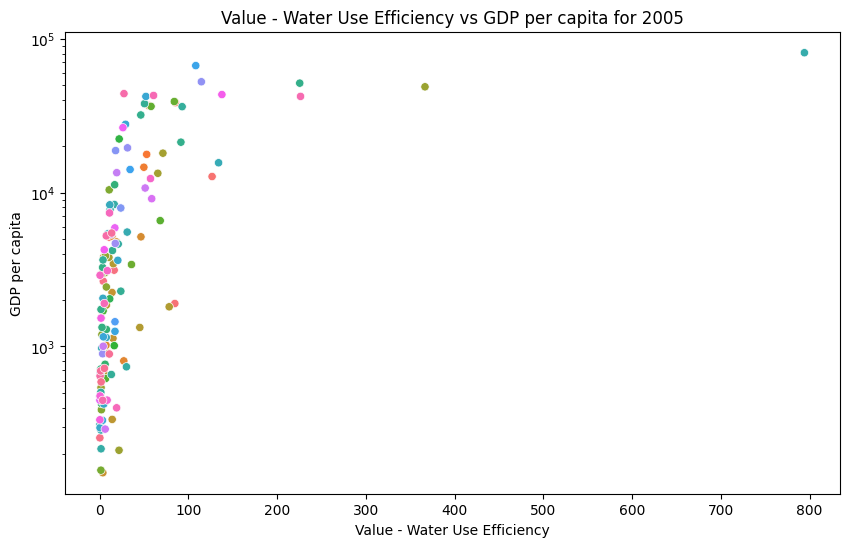

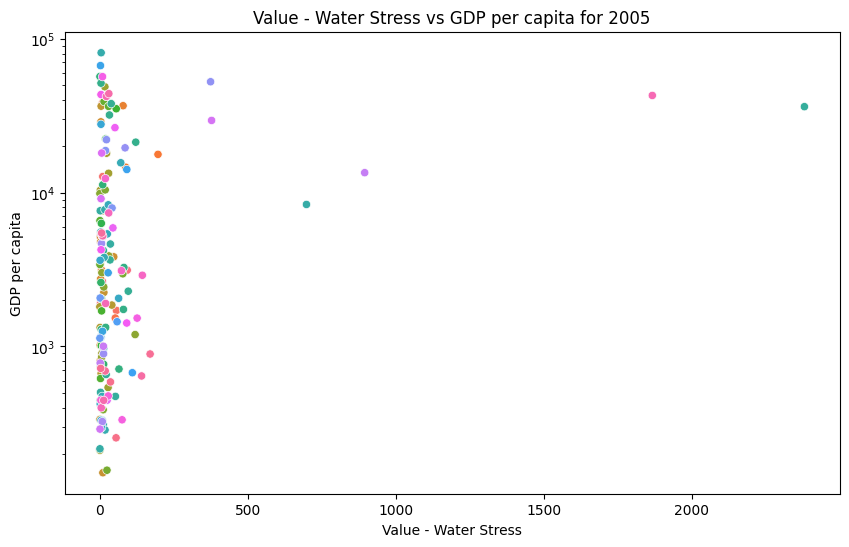

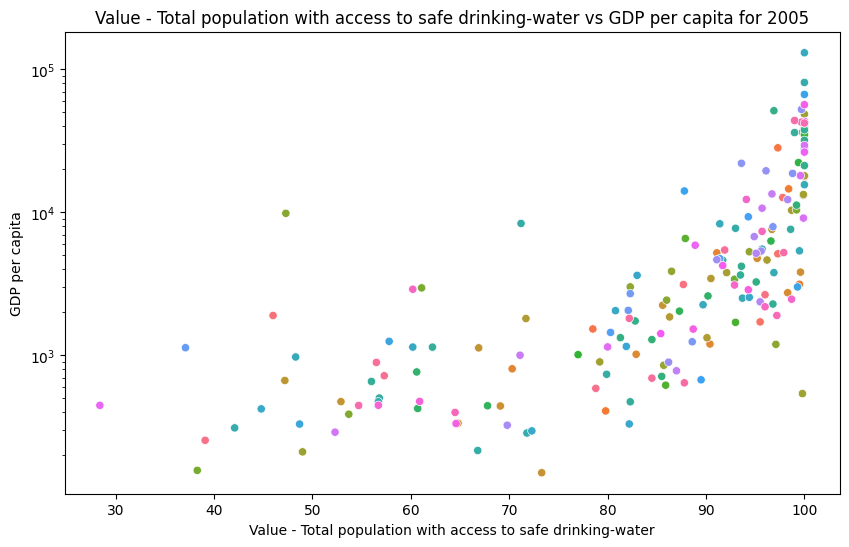

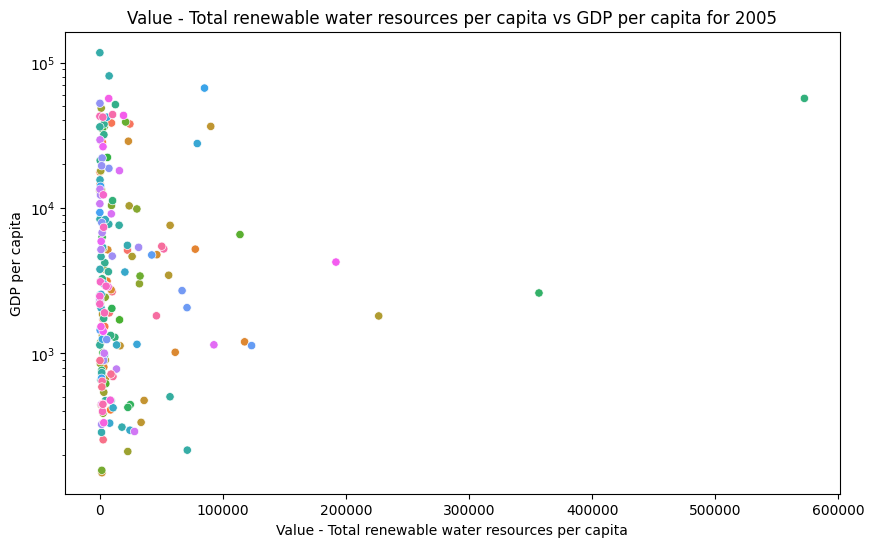

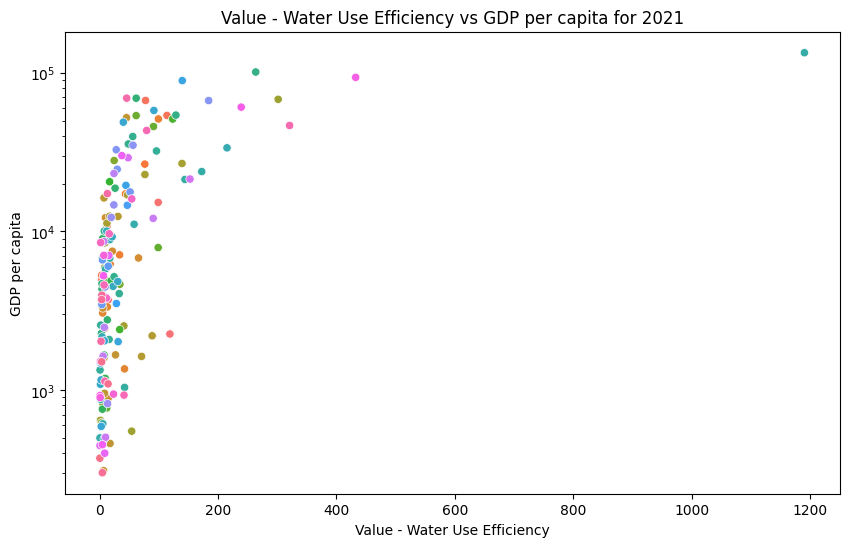

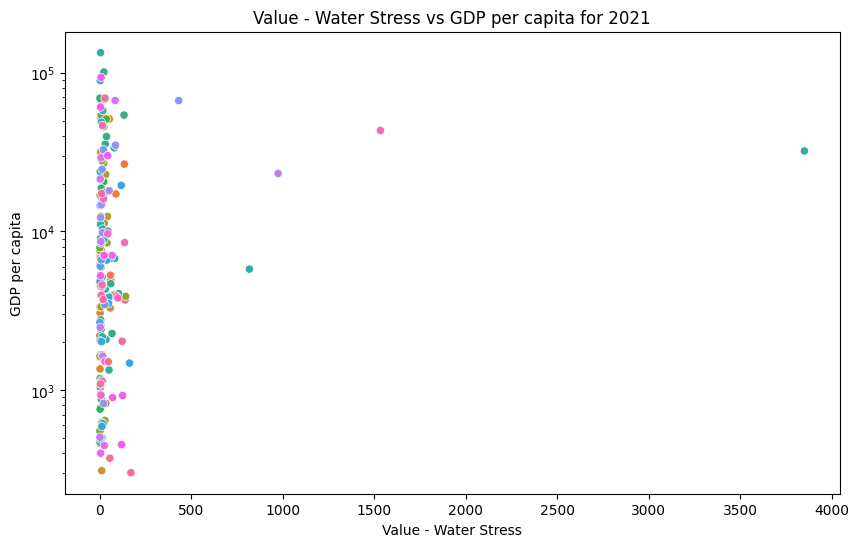

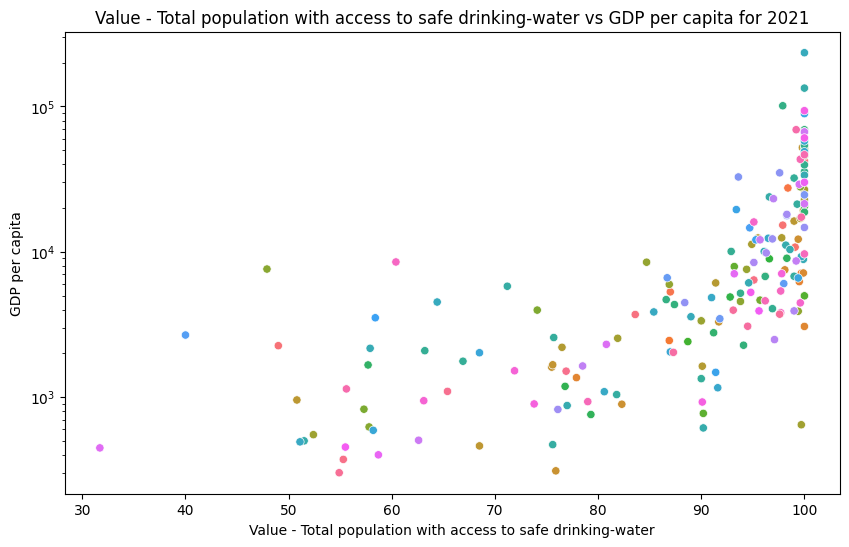

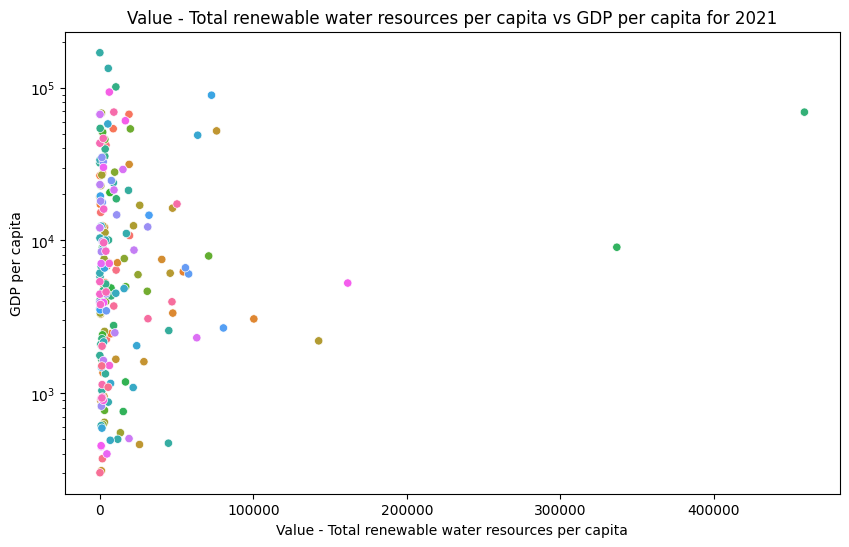

In [ ]:
# List of water-related columns
water_columns = [
    'Value - Water Use Efficiency', 'Value - Water Stress',
    'Value - Total population with access to safe drinking-water', 'Value - Total renewable water resources per capita'
]

# Plot scatter plots for each year
years = aquastat['Year'].unique()
for year in [2005,2021]:
    data_year = aquastat[aquastat['Year'] == year]
    for water_col in water_columns:
        plt.figure(figsize=(10, 6))
        sns.scatterplot(data=data_year, x=water_col, y='Value - GDP per capita', hue='Country', legend=False)
        plt.xlabel(water_col.replace('_', ' '))
        plt.ylabel('GDP per capita')
        plt.yscale('log')
        plt.title(f'{water_col.replace("_", " ")} vs GDP per capita for {year}')
        plt.show()

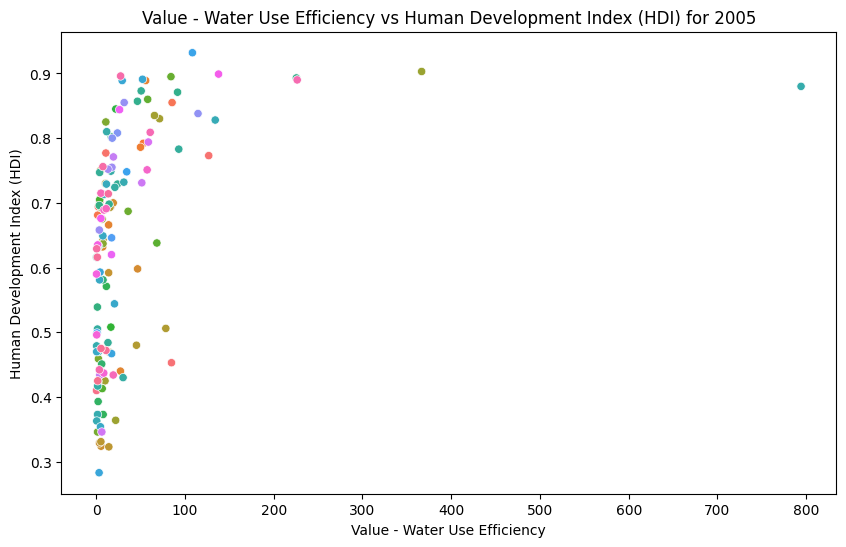

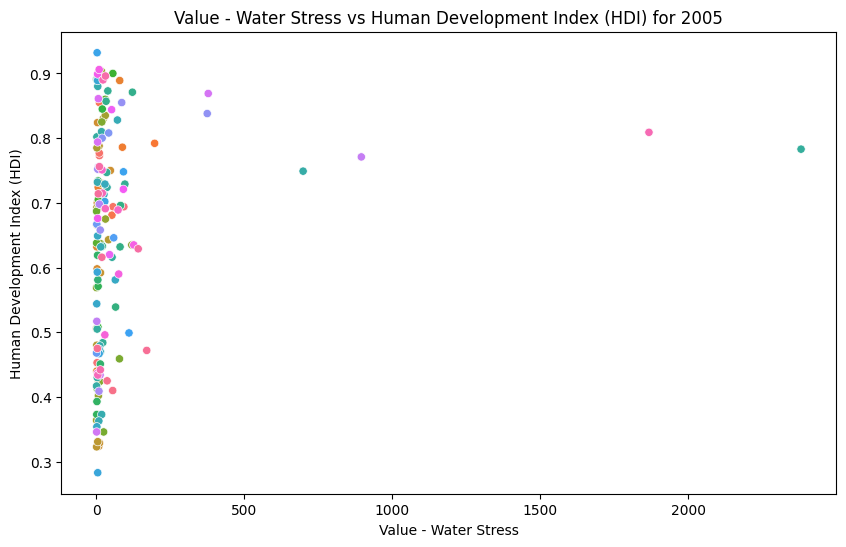

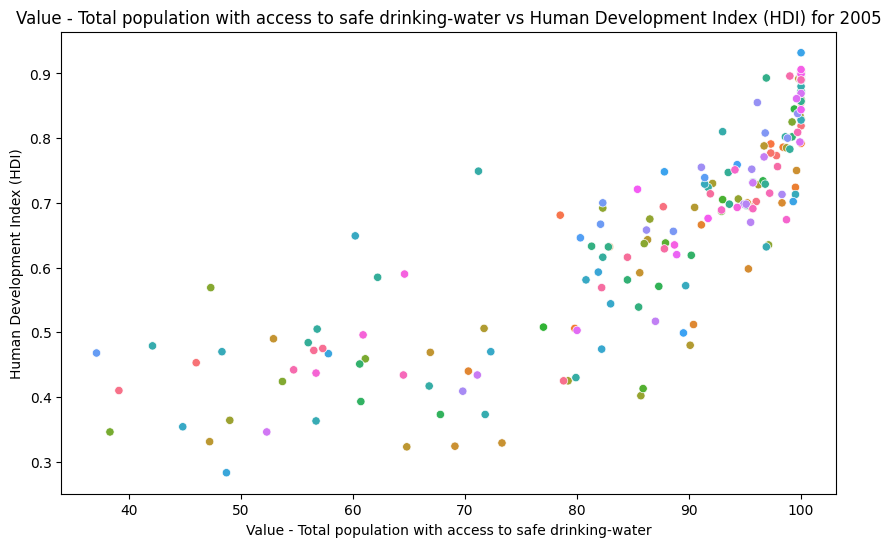

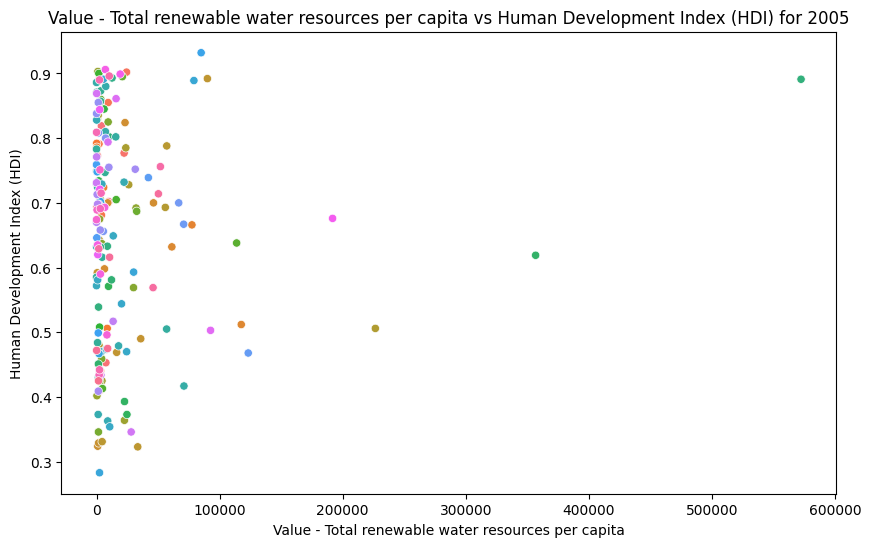

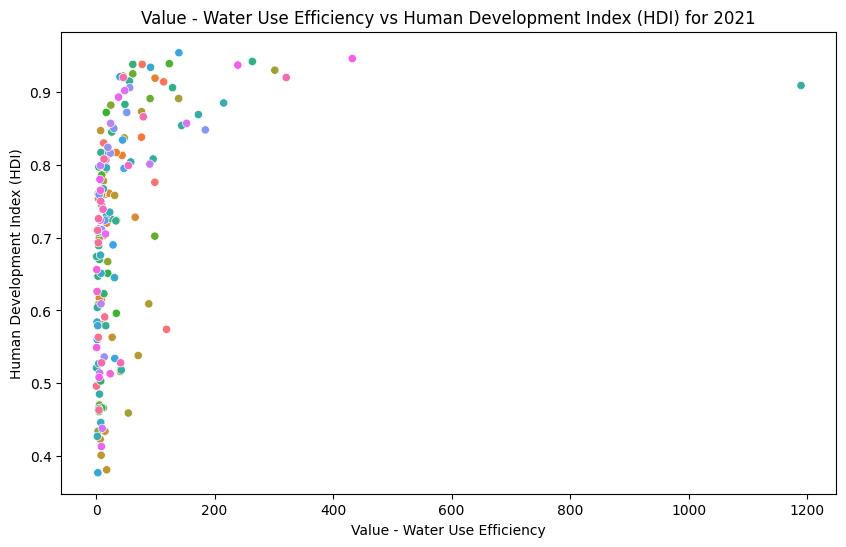

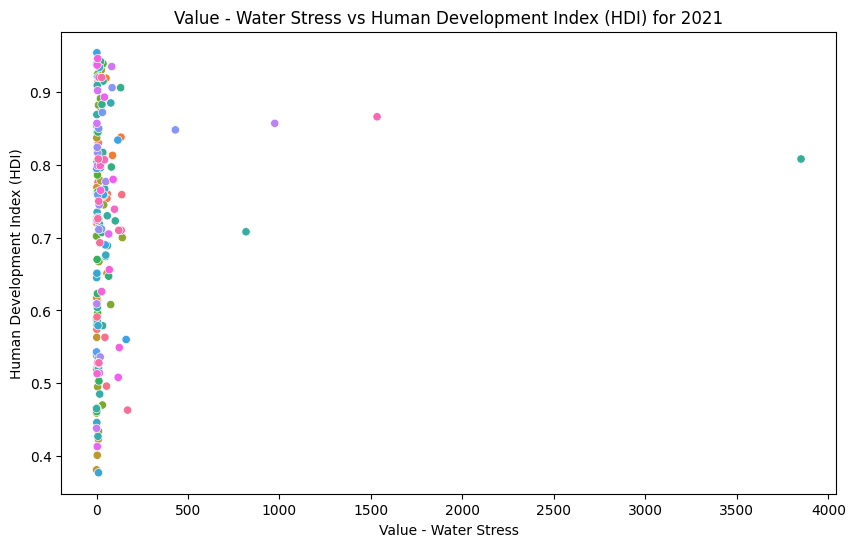

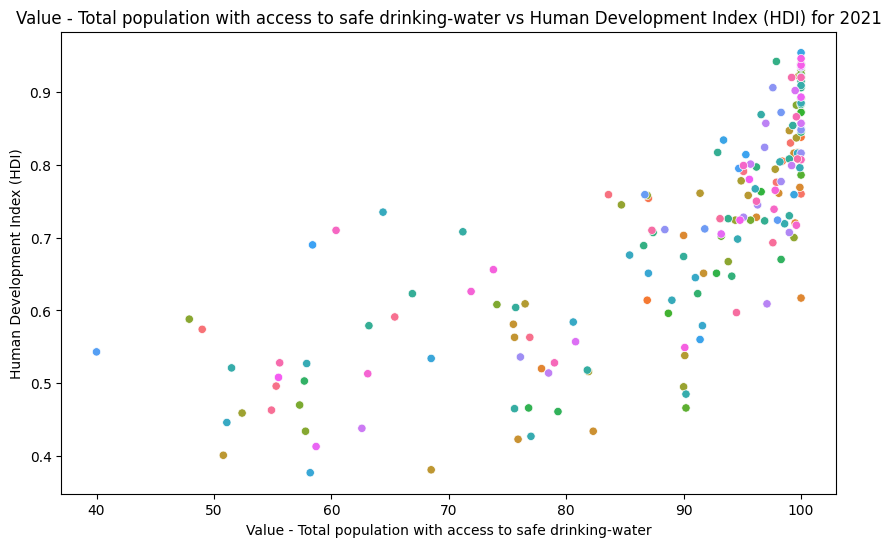

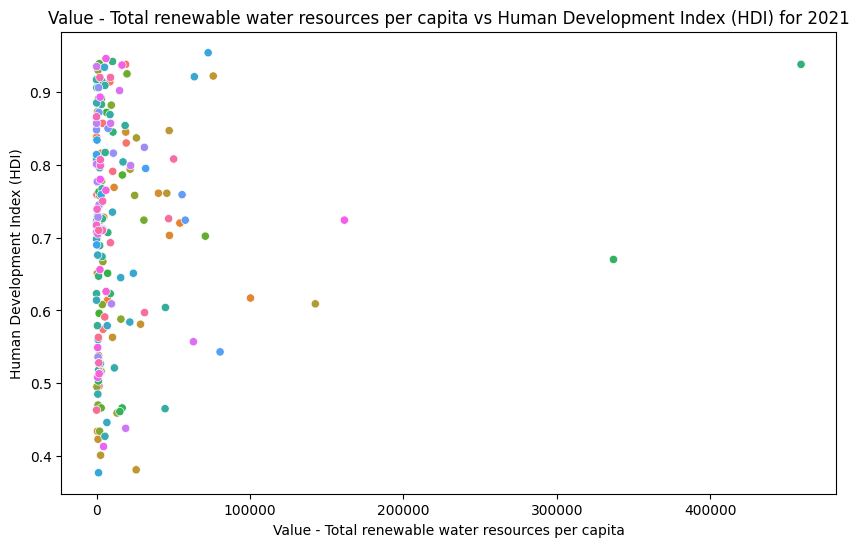

In [53]:
# List of water-related columns
water_columns = [
    'Value - Water Use Efficiency', 'Value - Water Stress',
    'Value - Total population with access to safe drinking-water', 'Value - Total renewable water resources per capita'
]

# Plot scatter plots for each year
years = aquastat['Year'].unique()
for year in [2005, 2021]:
    data_year = aquastat[aquastat['Year'] == year]
    for water_col in water_columns:
        plt.figure(figsize=(10, 6))
        sns.scatterplot(data=data_year, x=water_col, y='Value - HDI', hue='Country', legend=False)
        plt.xlabel(water_col.replace('_', ' '))
        plt.ylabel('Human Development Index (HDI)')
        plt.title(f'{water_col.replace("_", " ")} vs Human Development Index (HDI) for {year}')
        plt.show()

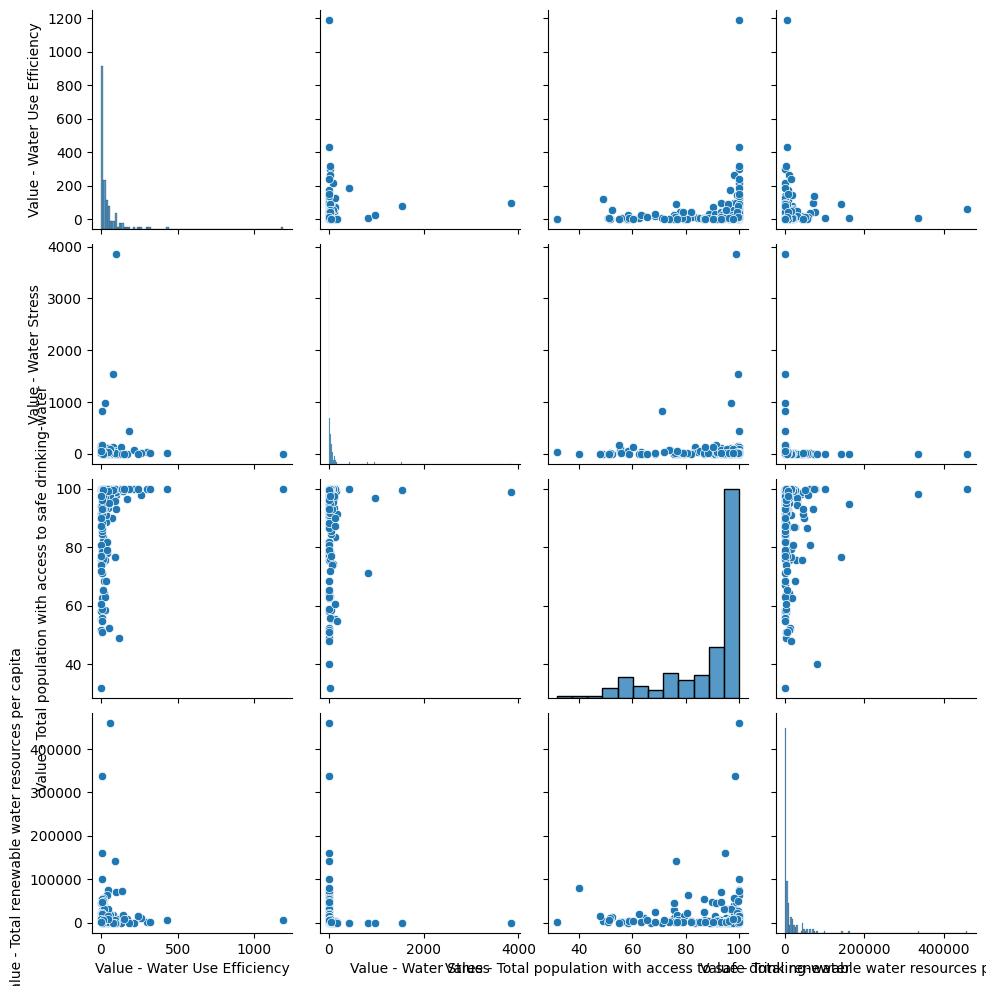

In [54]:
# Filter the data for the year 2021
data_2021 = aquastat[aquastat['Year'] == 2021]

# Select the water-related columns for the pair plot
water_columns = [
    'Value - Water Use Efficiency', 'Value - Water Stress',
    'Value - Total population with access to safe drinking-water', 'Value - Total renewable water resources per capita'
]

# Create the pair plot with more visible labels
sns.pairplot(data_2021[water_columns])
plt.show()

In [27]:
# Scatter plot using seaborn
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

aquastat = pd.read_csv('aquastat_data.csv')
# Group by 'Area' and calculate the mean only for numeric columns
aquastat_mean = aquastat.groupby('Country', as_index=False).mean(numeric_only=True)

# Create an interactive scatter plot
fig = px.scatter(
    aquastat_mean,
    x='Value - HDI',
    y='Value - GDP per capita',
    hover_name='Country',  # Displays the country name when hovering over a point
    title='Scatter Plot: Mean HDI vs Mean GDP per Capita',
    labels={
        'Value_Human Development Index (HDI) [highest = 1]': 'Mean Human Development Index (HDI)',
        'Value_GDP per capita': 'Mean GDP per Capita'
    },
    template='plotly',  # Optional: Choose a nice plot theme
    width=800,
    height=600
)

# Show the interactive plot
fig.show()

In [57]:
# Scatter plot using seaborn
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

aquastat = pd.read_csv('aquastat_data.csv')
# Group by 'Area' and calculate the mean only for numeric columns
aquastat_mean = aquastat.groupby('Country', as_index=False).mean(numeric_only=True)

# Create an interactive scatter plot
fig = px.scatter(
    aquastat_mean,
    x='Value - Total population with access to safe drinking-water',
    y='Value - Water Use Efficiency',
    hover_name='Country',  # Displays the country name when hovering over a point
    title='Scatter Plot: Mean HDI vs Mean GDP per Capita',
    labels={
        'Value_Human Development Index (HDI) [highest = 1]': 'Mean Human Development Index (HDI)',
        'Value_GDP per capita': 'Mean GDP per Capita'
    },
    template='plotly',  # Optional: Choose a nice plot theme
    width=800,
    height=600
)

# Show the interactive plot
fig.show()

## Histograms of different hydric variables for all countries, averaged over years

In [28]:
aquastat.columns

Index(['Country', 'Year', 'Value - GDP per capita', 'Unit - GDP per capita',
       'Value - HDI', 'Unit - HDI', 'Value - Water Use Efficiency',
       'Unit - Water Use Efficiency', 'Value - Water Stress',
       'Unit - Water Stress',
       'Value - Total population with access to safe drinking-water',
       'Unit - Total population with access to safe drinking-water',
       'Value - Total renewable water resources per capita',
       'Unit - Total renewable water resources per capita'],
      dtype='object')

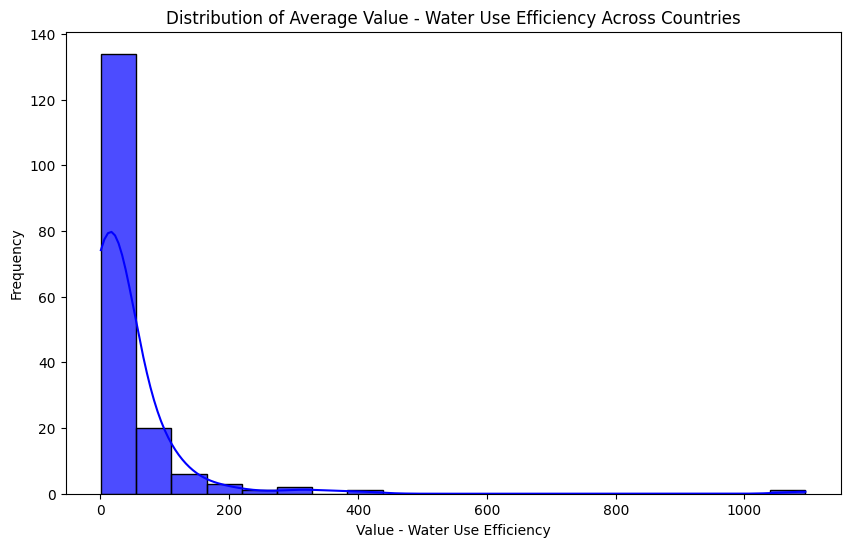

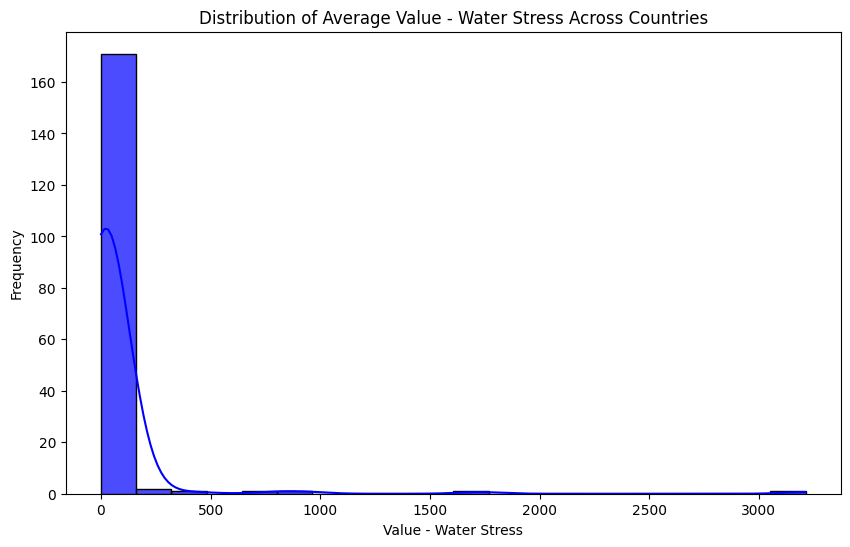

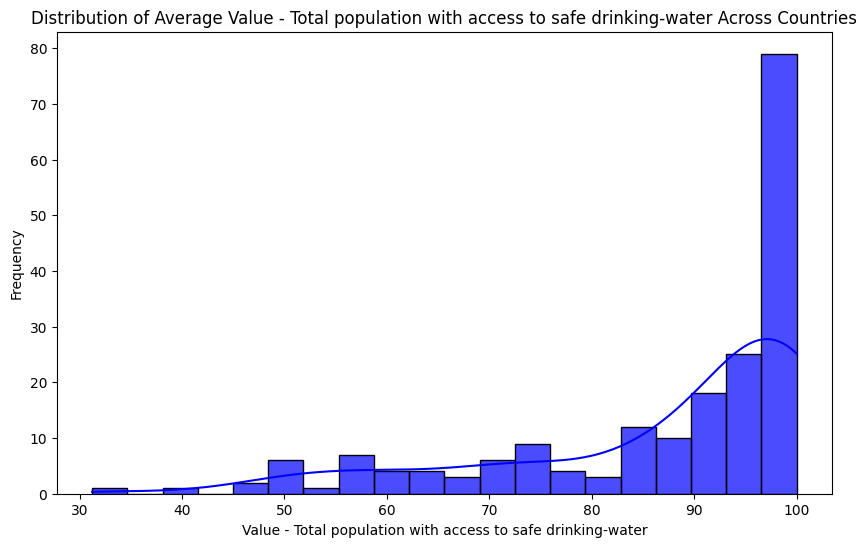

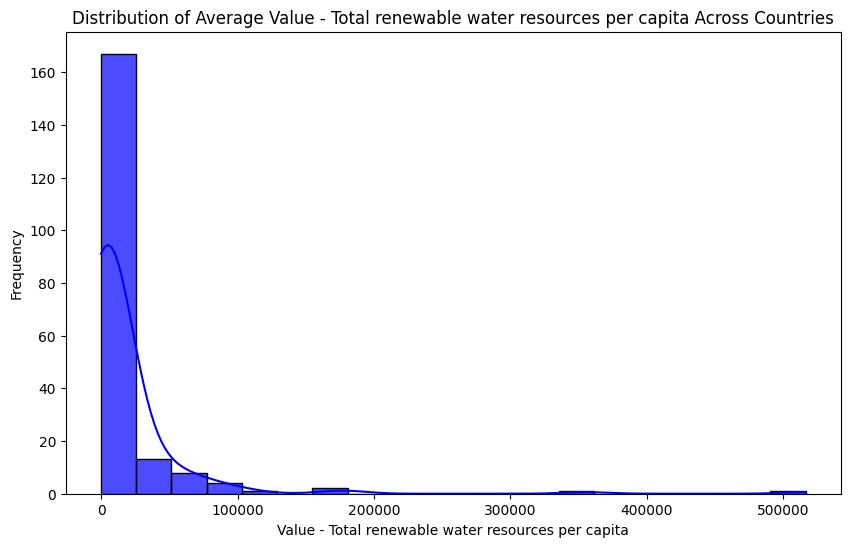

In [29]:
water_columns = [
    'Value - Water Use Efficiency', 'Value - Water Stress',
    'Value - Total population with access to safe drinking-water', 'Value - Total renewable water resources per capita'
]

# Calculer la moyenne pour chaque pays sur toutes les années pour les colonnes sélectionnées
country_means = aquastat.groupby('Country')[water_columns].mean()

# Créer un histogramme pour chaque variable
for water_col in water_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(country_means[water_col], bins=20, kde=True, color='blue', alpha=0.7)
    plt.xlabel(water_col.replace('_', ' '))
    plt.ylabel('Frequency')
    plt.title(f'Distribution of Average {water_col.replace("_", " ")} Across Countries')
    plt.show()


## Time visualisation of hydric variables of a country

Select the country you wanna visualize below

Dropdown(description='Country:', index=63, options=('Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', …

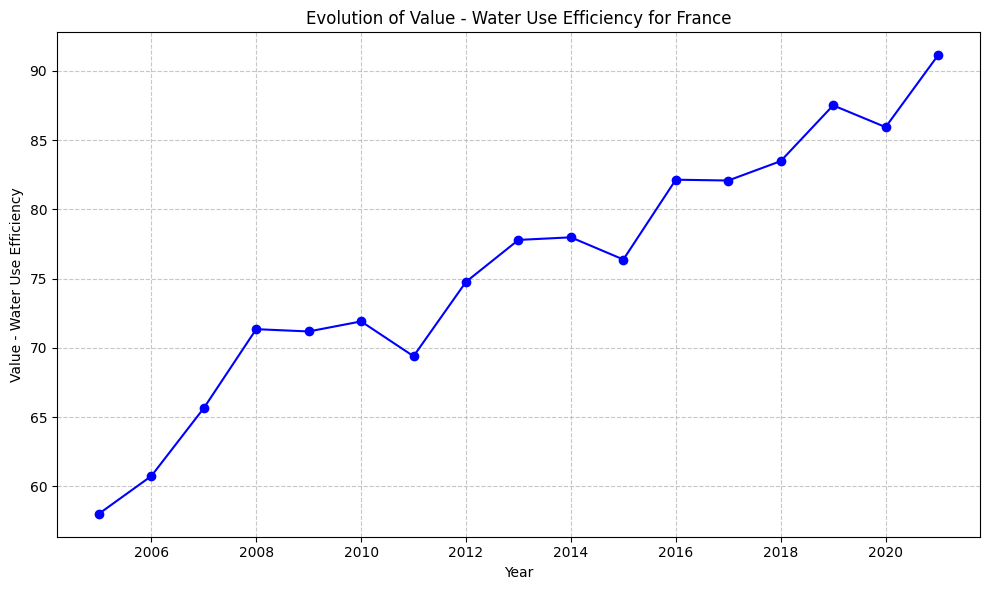

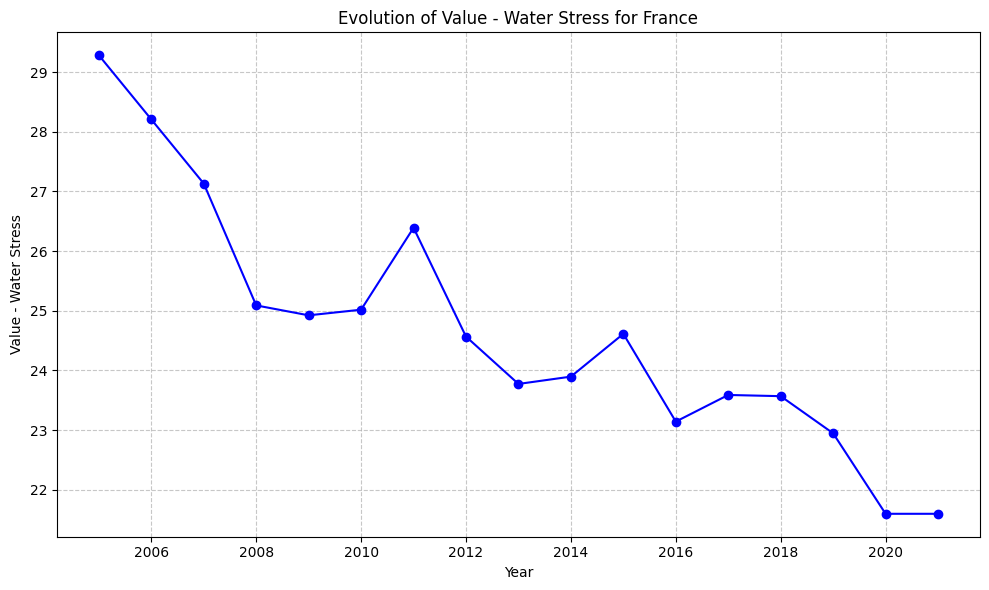

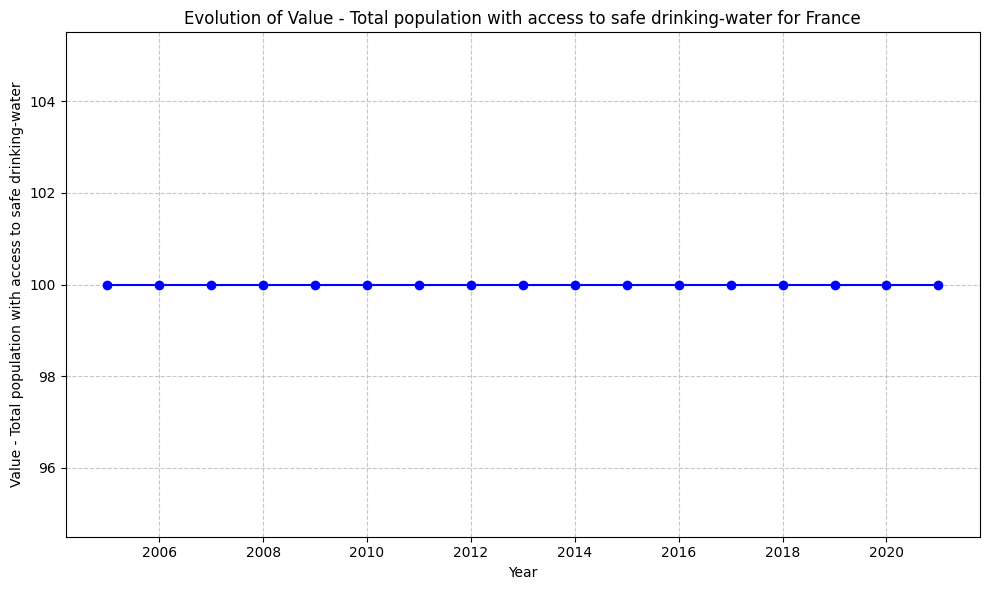

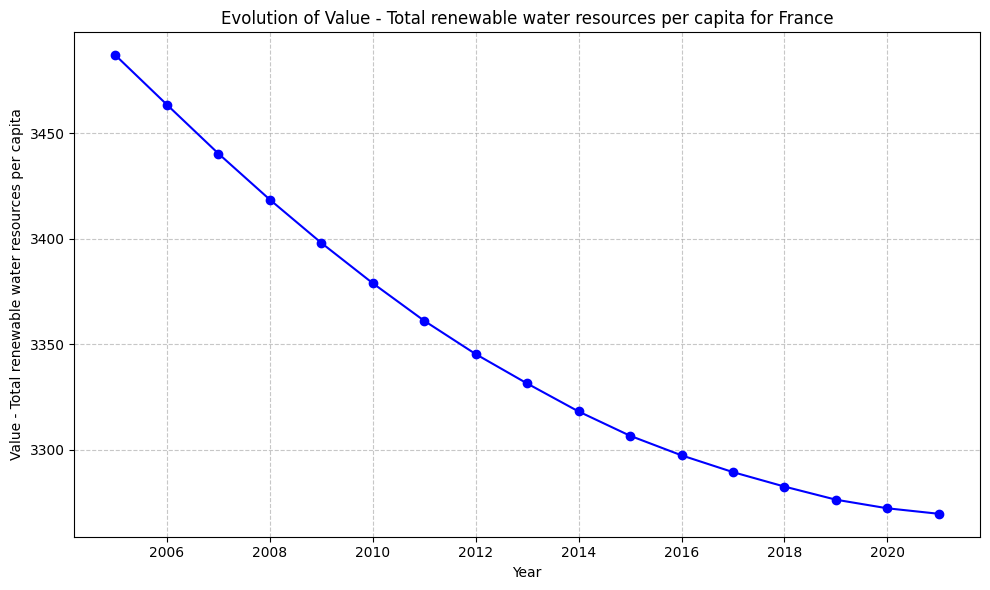

In [30]:
import ipywidgets as widgets
from IPython.display import display, clear_output

water_columns = [
    'Value - Water Use Efficiency', 'Value - Water Stress',
    'Value - Total population with access to safe drinking-water', 'Value - Total renewable water resources per capita'
]

# Liste des pays disponibles dans vos données
countries = aquastat['Country'].unique()

# Création du widget de sélection de pays
country_selector = widgets.Dropdown(
    options=countries,
    value='France',  # Pays par défaut
    description='Country:',
    style={'description_width': 'initial'}
)

# Fonction pour afficher les graphiques
def plot_country_data(selected_country):
    clear_output(wait=True)  # Effacer les graphiques précédents
    display(country_selector)  # Réafficher le widget
    country_data = aquastat[aquastat['Country'] == selected_country]
    
    for water_col in water_columns:
        plt.figure(figsize=(10, 6))
        plt.plot(country_data['Year'], country_data[water_col], marker='o', linestyle='-', color='blue')
        plt.xlabel('Year')
        plt.ylabel(water_col.replace('_', ' '))
        plt.title(f'Evolution of {water_col.replace("_", " ")} for {selected_country}')
        plt.grid(visible=True, linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()

# Liaison du widget avec la fonction
country_selector.observe(lambda change: plot_country_data(change.new), names='value')

# Affichage du widget
display(country_selector)

# Afficher les graphiques pour le pays par défaut
plot_country_data(country_selector.value)


# PCA

In [13]:
aquastat = pd.read_csv("project/aquastat_data.csv")

In [27]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
# Columns to use for TSNE
value_columns = [
    'Value - Water Use Efficiency',
    'Value - Water Stress',
    'Value - Total population with access to safe drinking-water',
    'Value - Total renewable water resources per capita'
]

# Initialize new columns for TSNE results
aquastat['TSNE_1'] = np.nan
aquastat['TSNE_2'] = np.nan

# Perform TSNE for each year
for year in aquastat['Year'].unique():
    # Get data for current year
    year_mask = aquastat['Year'] == year
    year_data = aquastat[year_mask][value_columns]
    
    # Drop rows with any missing values
    year_data_clean = year_data.dropna()
    
    # If we have enough data points, perform TSNE
    if len(year_data_clean) >= 2:  # TSNE needs at least 2 samples
        # Standardize the features
        scaler = StandardScaler()
        scaled_data = scaler.fit_transform(year_data_clean)
        
        # Perform TSNE
        tsne = TSNE(n_components=2, random_state=42)
        tsne_results = tsne.fit_transform(scaled_data)
        
        # Update the original dataframe with TSNE results
        # Get the indices of the non-NA rows we used
        valid_indices = year_data_clean.index
        aquastat.loc[valid_indices, 'TSNE_1'] = tsne_results[:, 0]
        aquastat.loc[valid_indices, 'TSNE_2'] = tsne_results[:, 1]


In [38]:
# Filter the data for the year 2010
data_2010 = aquastat[aquastat['Year'] == 2007]

# Create an interactive scatter plot with Plotly
fig = px.scatter(
    data_2010,
    x='TSNE_1',
    y='TSNE_2',
    hover_name='Country',  # Displays the country name when hovering over a point
    title='t-SNE of Water-Related Variables for 2010',
    labels={'TSNE1': 'TSNE1', 'TSNE2': 'TSNE2'},
    template='plotly_white',  # Optional: Choose a nice plot theme
    width=800,
    height=600
)

# Show the interactive plot
fig.show()
